# Gradient Boosting and GridSearch

## The Data



This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

## Imports

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./Archive/Machine Learning/Dataset/mushrooms.csv')

In [5]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Data Prep

In [6]:
X = df.drop('class',axis=1)

In [7]:
X = pd.get_dummies(X,drop_first=True)

In [8]:
y = df['class']

In [9]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [10]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

## Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

## Gradient Boosting and Grid Search with CV

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |
 |  Gradient Boosting for classification.
 |
 |  This algorithm builds an additive model in a forward stage-wise fashion; it
 |  allows for the optimization of arbitrary differentiable loss functions. In
 |  each stage ``n_classes_`` regression trees are fit on the negative gradient
 |  of the loss function, e.g. binary or multiclass log loss. Binary
 |  classification is a special case where only a single regression tre

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

In [19]:
gb_model = GradientBoostingClassifier()

In [20]:
grid = GridSearchCV(gb_model,param_grid)

In [21]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [22]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 100}

## Evaluation

In [23]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score

In [24]:
predictions = grid.predict(X_test)

In [25]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [27]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 2.10880186e-16, 0.00000000e+00, 0.00000000e+00,
       4.78254701e-17, 1.04652037e-03, 2.99814180e-17, 3.78276239e-06,
       0.00000000e+00, 0.00000000e+00, 4.57115287e-17, 0.00000000e+00,
       1.37833974e-17, 0.00000000e+00, 0.00000000e+00, 3.34879058e-08,
       2.31053911e-03, 5.14662582e-02, 6.24175887e-04, 1.00119362e-02,
       1.82499853e-02, 2.72072693e-06, 6.14744334e-01, 5.61116517e-03,
       0.00000000e+00, 0.00000000e+00, 1.65946018e-17, 1.25092906e-02,
       1.08992939e-02, 0.00000000e+00, 1.93644975e-16, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.80921898e-18,
       1.60075367e-16, 0.00000000e+00, 3.41314566e-17, 0.00000000e+00,
       9.09335612e-04, 0.00000000e+00, 1.36037854e-01, 3.02822984e-03,
       3.31070641e-02, 4.65375385e-04, 1.68926325e-03, 4.95063766e-06,
       1.76797782e-05, 2.54262804e-03, 3.33383283e-02, 1.03210456e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [28]:
feat_import = grid.best_estimator_.feature_importances_

In [30]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

In [31]:
imp_feats

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,2.108802e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,4.782547e-17
...,...
habitat_l,0.000000e+00
habitat_m,8.201692e-17
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [32]:
imp_feats.sort_values("Importance",ascending=False)

,Importance
odor_n,0.614744
stalk-root_c,0.136038
bruises_t,0.051466
stalk-surface-below-ring_y,0.033338
stalk-root_r,0.033107
...,...
stalk-color-below-ring_p,0.000000
gill-color_e,0.000000
veil-color_o,0.000000
gill-color_y,0.000000


In [35]:
imp_feats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,95.0,0.010526,0.064629,0.0,0.0,1.936450e-16,0.000802,0.614744


In [36]:
imp_feats = imp_feats[imp_feats['Importance'] > 0.000527]

In [37]:
imp_feats.sort_values('Importance')

,Importance
stalk-color-below-ring_w,0.000575
odor_c,0.000624
ring-number_t,0.000695
stalk-shape_t,0.000909
cap-surface_g,0.001047
spore-print-color_w,0.001477
stalk-surface-above-ring_s,0.001689
ring-type_p,0.002017
stalk-color-below-ring_c,0.002120
cap-color_y,0.002311


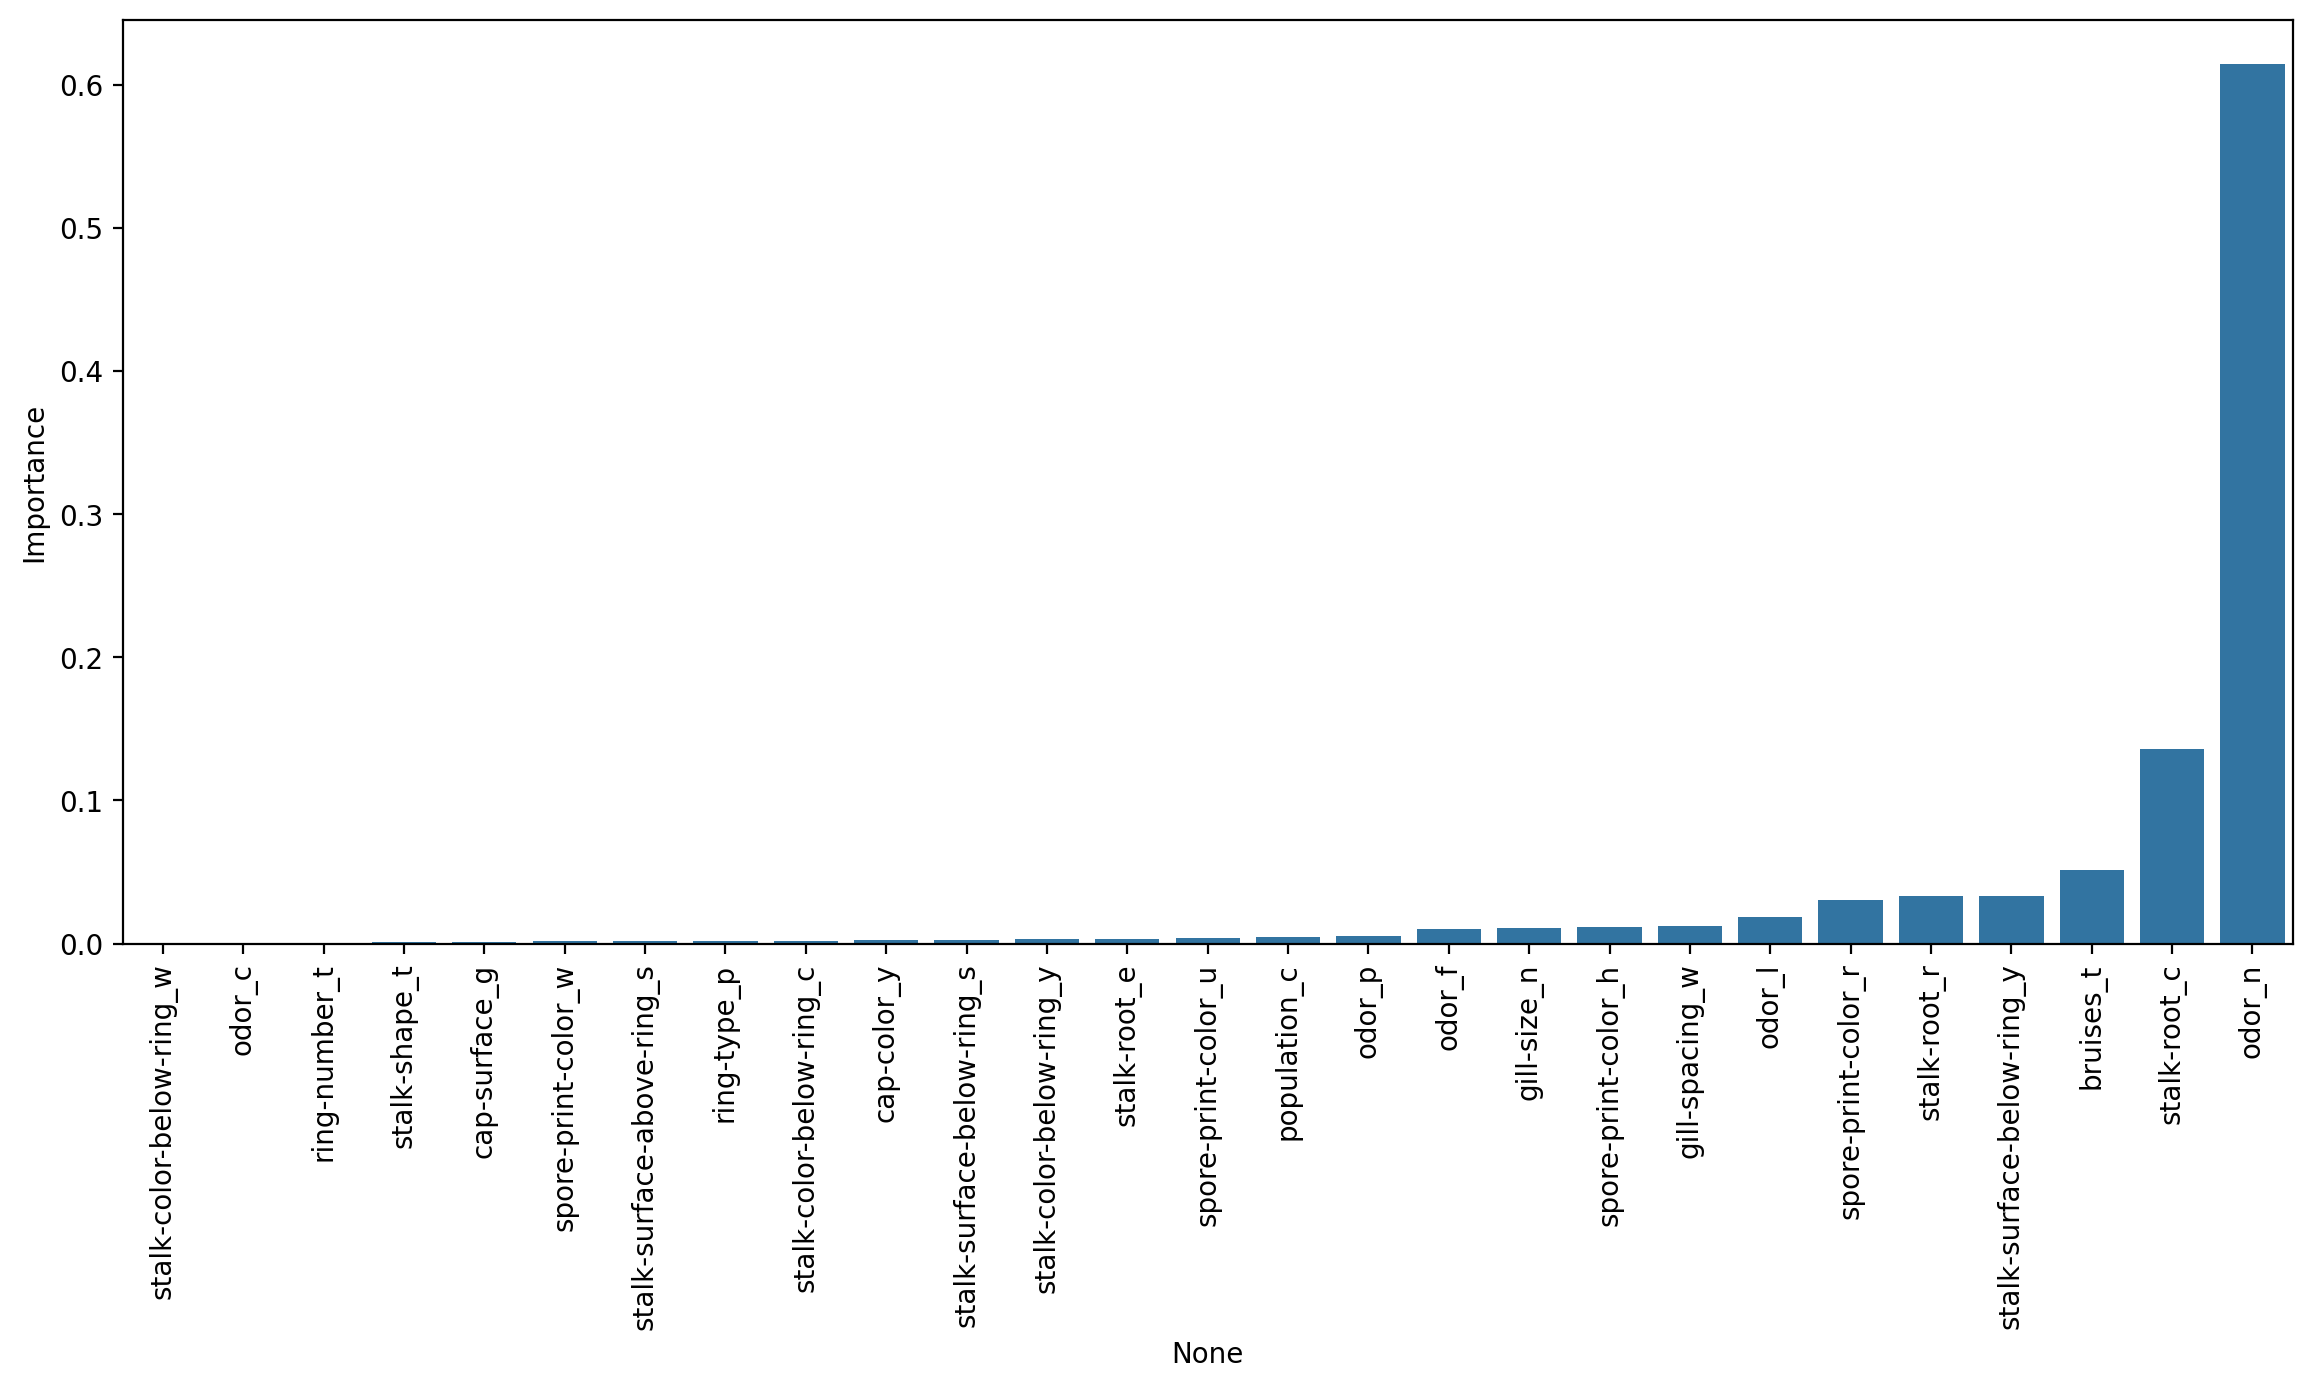

In [38]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);